In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import pandas as pd 
from pandas import read_csv
import matplotlib.pyplot as pyplot
import numpy as np 
from numpy import concatenate
from tqdm import tqdm
import math
import datetime
import gc
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [2]:
train=pd.read_csv("./data/Train.csv")
test=pd.read_csv("./data/Test.csv")
sample_sub=pd.read_csv("./data/sample_sub.csv")

In [3]:
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train[feature]=train[feature].apply(lambda x: x[1:-1].split(','))
    test[feature]=test[feature].apply(lambda x:x[1:-1].split(','))

In [4]:
encoder = LabelEncoder()

In [5]:
train['location'] = encoder.fit_transform(train['location'])
test['location'] = encoder.fit_transform(test['location'])

In [6]:
train = train.drop(["ID"],axis=1)
test = test.drop(["ID"],axis=1)

In [7]:
targets = train["target"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001705EAD5C48>],
      dtype=object)

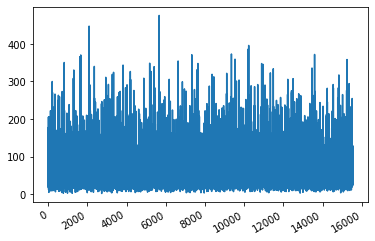

In [8]:
targets.plot(subplots=True)

In [9]:
train.drop(["target"],axis=1,inplace=True)

In [10]:
lst = [2]*121
train["location"] = train["location"].astype('object')
test["location"] = test["location"].astype('object')

In [11]:
for index,loc in enumerate(train["location"],start=0):
    lst = [loc]*121
    train.at[index,"location"] = lst
for index2,loc2 in enumerate(test["location"],start=0):
    lst = [loc2]*121
    test.at[index2,"location"] = lst

In [12]:
train.drop(0,inplace=True)

In [13]:
dFrames = []
dTestFrames = []

In [14]:
for index,column in tqdm(enumerate(train.columns,start=0)):
    print(column)
    dFrames.append(pd.DataFrame(train[column].values.tolist()))
    for col in dFrames[index]:
        dFrames[index].rename(columns={col:column+str(col)},inplace=True)   

0it [00:00, ?it/s]

location


1it [00:01,  1.25s/it]

temp


2it [00:10,  3.53s/it]

precip


3it [00:18,  5.12s/it]

rel_humidity


4it [00:27,  6.23s/it]

wind_dir


5it [00:36,  7.00s/it]

wind_spd


6it [00:45,  7.53s/it]

atmos_press


7it [00:54,  7.72s/it]


In [15]:
for index,column in tqdm(enumerate(test.columns,start=0)):
    print(column)
    dTestFrames.append(pd.DataFrame(test[column].values.tolist()))
    for col in dTestFrames[index]:
        dTestFrames[index].rename(columns={col:column+str(col)},inplace=True)

0it [00:00, ?it/s]

location


1it [00:00,  2.25it/s]

temp


2it [00:03,  1.15s/it]

precip


3it [00:06,  1.64s/it]

rel_humidity


4it [00:08,  1.99s/it]

wind_dir


5it [00:11,  2.22s/it]

wind_spd


6it [00:14,  2.40s/it]

atmos_press


7it [00:17,  2.46s/it]


In [16]:
dFrames[1].loc[15500]

temp0       8.96666667
temp1            30.95
temp2      32.13333333
temp3      32.15833333
temp4      32.74166667
              ...     
temp116          18.55
temp117    18.45833333
temp118    19.25833333
temp119    21.84166667
temp120            24.
Name: 15500, Length: 121, dtype: object

In [17]:
tempSample = dFrames[1].iloc[15526,]

In [18]:
tempSampleInterpolated = pd.to_numeric(tempSample,errors="coerce")

In [19]:
tempSampleInterpolated =tempSampleInterpolated.reset_index()
# tempSample =tempSample.reset_index()

In [20]:
tempSampleInterpolated.interpolate(method="spline",order=2,inplace=True)

In [21]:
tempSampleInterpolated.drop('index',axis=1,inplace=True)
# tempSample.drop('index',axis=1,inplace=True)

In [22]:
tempSample = tempSample.values

In [23]:
tempSample = tempSample.flatten()

No handles with labels found to put in legend.


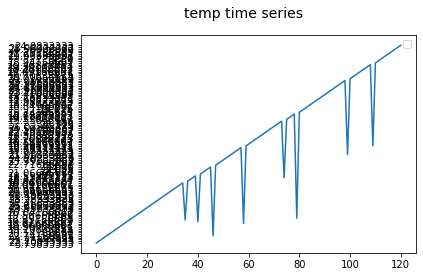

In [24]:
fig = pyplot.figure()
fig.suptitle('temp time series', fontsize=14)
pyplot.plot(tempSample)
# pyplot.plot(tempSampleInterpolated)





pyplot.legend()
pyplot.show()

In [26]:
for index in tqdm(range(1,7)):
    print(index)
    for col in dTestFrames[index].columns:
        dTestFrames[index][col] = pd.to_numeric(dTestFrames[index][col],errors="coerce")

  0%|                                                    | 0/6 [00:00<?, ?it/s]

1


 17%|███████▎                                    | 1/6 [00:01<00:07,  1.52s/it]

2


 33%|██████████████▋                             | 2/6 [00:03<00:06,  1.52s/it]

3


 50%|██████████████████████                      | 3/6 [00:04<00:04,  1.50s/it]

4


 67%|█████████████████████████████▎              | 4/6 [00:06<00:03,  1.52s/it]

5


 83%|████████████████████████████████████▋       | 5/6 [00:07<00:01,  1.53s/it]

6


100%|████████████████████████████████████████████| 6/6 [00:09<00:00,  1.52s/it]


In [27]:
for index in tqdm(range(1,7)):
    print(index)
    for col in dFrames[index].columns:
        dFrames[index][col] = pd.to_numeric(dFrames[index][col],errors="coerce")

  0%|                                                    | 0/6 [00:00<?, ?it/s]

1


 17%|███████▎                                    | 1/6 [00:04<00:24,  4.85s/it]

2


 33%|██████████████▋                             | 2/6 [00:09<00:19,  4.88s/it]

3


 50%|██████████████████████                      | 3/6 [00:14<00:14,  4.88s/it]

4


 67%|█████████████████████████████▎              | 4/6 [00:19<00:09,  4.89s/it]

5


 83%|████████████████████████████████████▋       | 5/6 [00:24<00:04,  4.89s/it]

6


100%|████████████████████████████████████████████| 6/6 [00:29<00:00,  4.89s/it]


In [28]:
result = pd.concat(dFrames,axis=1, ignore_index=True)

In [29]:
resultTest = pd.concat(dTestFrames,axis=1, ignore_index=True)

In [30]:
for index, col in enumerate(resultTest,start=0):
    resultTest[col].interpolate(method="linear",inplace=True)

In [31]:
for index, col in enumerate(result,start=0):
    result[col].interpolate(method="linear",inplace=True)

In [32]:
result_array = result.values


In [33]:
result_test_array =resultTest.values

In [34]:
result_array = np.nan_to_num(result_array)
result_test_array = np.nan_to_num(result_test_array)

In [35]:
result = pd.concat([result,targets],axis=1)

In [36]:
resultTest = pd.DataFrame(data=result_test_array)

In [37]:
result.to_csv('./data/processed_train.csv',index=False)

In [38]:
resultTest.to_csv('./data/processed_test.csv',index=False)

In [39]:
train_processed=pd.read_csv("./data/processed_train.csv")
test_processed=pd.read_csv("./data/processed_train.csv")

In [40]:
train_processed.shape

(15539, 848)